### 1. Import Library

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import os
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

__2. Animal Character Mapping__

In [2]:
animal_img_map = {
    0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"
}

__3. Image Preprocessing Function__

In [3]:
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Warning: Unable to read image at {image_path}")
        return None
    image = cv2.resize(image, (32,32))  # Resize to a fixed size
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    return image

__4. Dataset Loading Function__

In [4]:
def load_dataset(dataset_path):
    images = []   # empty list
    labels = []
    class_names = sorted(os.listdir(dataset_path))
    valid_extensions = ('.bmp', '.png', '.jpg', '.jpeg')  # Add other valid extensions if needed
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for image_name in os.listdir(class_path):
            if image_name.lower().endswith(valid_extensions):
                image_path = os.path.join(class_path, image_name)
                image = load_and_preprocess_image(image_path)
                if image is not None:
                    images.append(image)
                    labels.append(label)
    return np.array(images, dtype=np.float32), np.array(labels, dtype=np.int32), class_names


__5. Dataset Path__

In [5]:
train_dataset_path = './dataset/train'
test_dataset_path = './dataset/test'

train_images, train_labels, train_class_names = load_dataset(train_dataset_path)
test_images, test_labels, test_class_names = load_dataset(test_dataset_path)


__6__

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

def build_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Convolution Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolution Block 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolution Block 3
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Flatten and Dense Layers
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model


In [7]:
from sklearn.model_selection import train_test_split
train_images1, X_vali, train_labels1, y_vali = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

__7. Build Model__

In [8]:
input_shape = (32, 32, 1)  # Height, Width, Channels
num_classes = len(train_class_names)  # Number of unique Bengali letters

model = build_cnn_model(input_shape, num_classes)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

__8. Compile the model__

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_data=(X_vali, y_vali))

# Evaluate the model
model.evaluate(test_images, test_labels)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.3950 - loss: 1.6771 - val_accuracy: 0.5396 - val_loss: 1.3310
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5526 - loss: 1.2747 - val_accuracy: 0.6450 - val_loss: 1.0416
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6149 - loss: 1.1110 - val_accuracy: 0.6954 - val_loss: 0.8822
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6514 - loss: 1.0103 - val_accuracy: 0.7072 - val_loss: 0.8587
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6764 - loss: 0.9309 - val_accuracy: 0.7444 - val_loss: 0.7382
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6980 - loss: 0.8702 - val_accuracy: 0.7608 - val_loss: 0.6799
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7167 - loss: 0.8178 - val_accuracy: 0.7854 - val_loss: 0.6108
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 

[1.9220173358917236, 0.7161999940872192]

__9__

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input

def build_lenet5_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # C1: Convolutional Layer (6 filters, 5x5)
    x = Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', padding='same')(inputs)

    # S2: Average Pooling Layer (2x2)
    x = AveragePooling2D(pool_size=(2, 2), strides=2)(x)

    # C3: Convolutional Layer (16 filters, 5x5)
    x = Conv2D(filters=16, kernel_size=(5, 5), activation='tanh', padding='same')(x)

    # S4: Average Pooling Layer (2x2)
    x = AveragePooling2D(pool_size=(2, 2), strides=2)(x)

    # C5: Convolutional Layer (120 filters, 5x5)
    x = Conv2D(filters=120, kernel_size=(5, 5), activation='tanh', padding='same')(x)

    # Flatten before fully connected layers
    x = Flatten()(x)

    # F6: Fully Connected Layer with 84 units
    x = Dense(units=84, activation='tanh')(x)

    # Output Layer
    outputs = Dense(units=num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


__10__

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted label: 3, Predicted text: cat


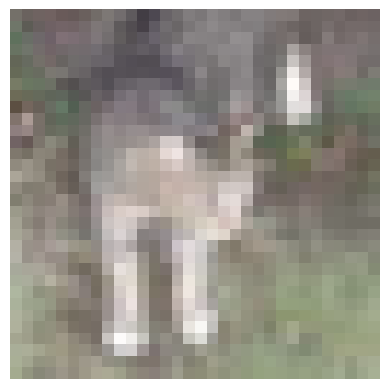

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Predict text from a new image
new_image_path = './dataset/train/cat/1794.png'
new_image = load_and_preprocess_image(new_image_path)

if new_image is not None:
    prediction = model.predict(np.expand_dims(new_image, axis=0))
    predicted_label = np.argmax(prediction)

    # Get the Bengali character using the mapping dictionary
    predicted_text = animal_img_map.get(predicted_label, "Unknown")

    print(f"Predicted label: {predicted_label}, Predicted text: {predicted_text}")

    # Display the image using OpenCV
    img = cv2.imread(new_image_path)
    # cv2.imshow(img)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

else:
    print("Unable to read the new image.")